## ITDI Shared Task @ VarDial 2022 submission


In this notebook, we briefly introduce how to train and validate the Logistic Regression model developed to tackle the Identification of Languages and Dialects of Italy task from VarDial 2022 shared task. 

### Data loading
Firstly, we import some useful libraries and read the training and development data.

In [1]:
import pandas as pd
from src.utils import explain_label, load_data

In [2]:
X_train, y_train, X_val, y_val = load_data(train_path="data/train.csv", val_path="data/dev.txt")

### Model training
Import and initialize the logistic regression model. Fit it using the given training and validation data.

In [3]:
from src.models import LogisticRegressionITDI

model = LogisticRegressionITDI(verbose=1)
_, _, cm = model.fit(X_train=X_train, y_train=y_train, X_val=X_val, y_val=y_val)

Vectorizing and normalizing training data...
Fitting Logistic Regression...
Evaluating the model...
Training completed, train_f1 : 0.9924636234795424, val_f1 : 0.9445506692160612


Finally, plot the confusion matrix for the validation set.

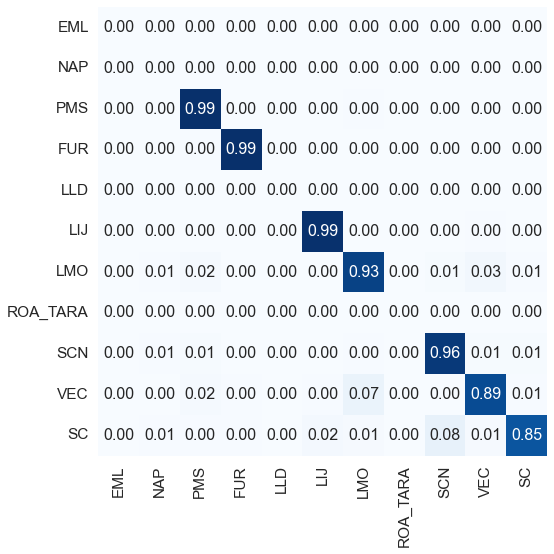

In [16]:
from src.utils import explain_label
import matplotlib.pyplot as plt
import seaborn as sns

df_cm = pd.DataFrame(cm, index = [explain_label(i) for i in range(0,11)], columns = [explain_label(i) for i in range(0,11)])

plt.figure(figsize = (8, 8))
sns.set(font_scale=1.4) # for label size
ax = sns.heatmap(df_cm, 
            annot=True, 
            annot_kws={"size": 16}, 
            fmt='.2f', 
            cmap="Blues",
            cbar=False) 

plt.tight_layout()  
plt.show()

### Inference
And now, some inference! Let's try to classify some Italian dialects sentences that are not in the training set.

In [5]:
sentence = "ara che e cavare e magna par tera"
explain_label(model.predict(sentence)[0])

'VEC'

In [6]:
sentence = "Vien’accà! Vien’ a te piglia’ ‘o perdono! Vien’accà! È tutt’ appost piccirill’! Tutt’ appost! È fernut’ tutt’ cos’!"
explain_label(model.predict(sentence)[0])

'NAP'

In [7]:
sentence = "Boja Fàuss"
explain_label(model.predict(sentence)[0])

'PMS'